In [152]:
# Imports and utility functions

import pint
import numpy as np
ureg = pint.UnitRegistry()
from scipy.constants import physical_constants
import matplotlib.pyplot as plt
from sympy import nsolve
from sympy.abc import x

def get_constant(name):
    value, unit, uncertainty = physical_constants[name]
    return ureg(unit) * value
    
def plot_fn(fn, x_start, x_end):
    x = np.linspace(x_start, x_end, 1000)
    y = fn(x)
    x = x.to_reduced_units()
    y = y.to_reduced_units()
    x_units = x.units
    y_units = y.units
    x = x.magnitude
    y = y.magnitude
    plt.plot(x, y)
    plt.xlabel(f'{x_units}')
    plt.ylabel(f'{y_units}')


    

In [153]:
# General Units

nm = ureg('nm')
eV = ureg('eV')
hbar = get_constant('Planck constant over 2 pi')
m = get_constant('electron mass')

In [154]:
# Problem specific constants

w = 0.2 * nm +0j # well
z = 0.2 * nm+0j # barrier
a = w + z+0j # lattice constant
V = 2 * eV+0j # barrier height


In [155]:
# Problem specific functions

def alpha(E):
    # force complex math
    return np.sqrt(2 * m * (V - E) + 0j)/hbar
    
def beta(E):
    return np.sqrt(2 * m * E)/hbar

def f(E):
    b_ = beta(E)
    a_ = alpha(E)
    print (np.sin(b_ * w) * np.sinh(a_ * z))
    return np.cos(b_ * w) * np.cosh(a_ * z) + 1/2 * (a_/b_ - b_/a_) * np.sin(b_ * w) * np.sinh(a_ * z)

[0.        +0.00000000e+00j 0.28834148+0.00000000e+00j 0.40303698+0.00000000e+00j 0.48785076+0.00000000e+00j 0.55670618+0.00000000e+00j 0.61506844+0.00000000e+00j 0.6657768 +0.00000000e+00j 0.71053965+0.00000000e+00j 0.75048442+0.00000000e+00j 0.78640431+0.00000000e+00j 0.81888431+0.00000000e+00j 0.84837173+0.00000000e+00j 0.87521855+0.00000000e+00j 0.89970828+0.00000000e+00j 0.92207374+0.00000000e+00j 0.94250924+0.00000000e+00j 0.96117921+0.00000000e+00j 0.9782245 +0.00000000e+00j 0.99376699+0.00000000e+00j 1.00791314+0.00000000e+00j 1.02075667+0.00000000e+00j 1.0323807 +0.00000000e+00j 1.04285941+0.00000000e+00j 1.05225942+0.00000000e+00j 1.0606408 +0.00000000e+00j 1.06805804+0.00000000e+00j 1.07456076+0.00000000e+00j 1.08019429+0.00000000e+00j 1.08500022+0.00000000e+00j 1.08901683+0.00000000e+00j 1.09227943+0.00000000e+00j 1.09482071+0.00000000e+00j 1.09667098+0.00000000e+00j 1.09785844+0.00000000e+00j 1.09840933+0.00000000e+00j 1.09834816+0.00000000e+00j 1.09769782+0.00000000e+00j 

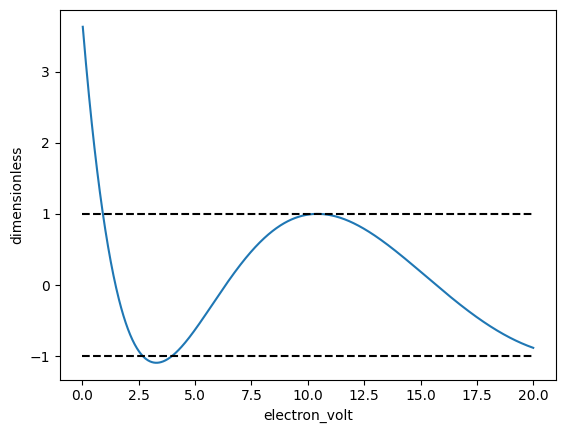

In [157]:
plot_fn(f, 0 * eV, 20 * eV)
plt.plot([0, 20], [1, 1], 'k--')
plt.plot([0, 20], [-1, -1], 'k--')

In [162]:
f(x)

TypeError: loop of ufunc does not support argument 0 of type Mul which has no callable sqrt method

In [171]:
from sympy.physics.units import kilometer

In [172]:
( 5j * kilometer)**0.5

2.23606797749979*I**0.5*kilometer**0.5

In [176]:
from sympy import cosh
from sympy.abc import x
cosh(( 5*x * kilometer)**0.5)

cosh(2.23606797749979*kilometer**0.5*x**0.5)

In [191]:
nsolve(((( 5*x * kilometer)**0.5 - 0.1 * kilometer ** 0.5)/kilometer**0.5).simplify(), 0.1 )

ValueError: Could not find root within given tolerance. (8.4491116481067586582e-18 > 2.16840434497100886801e-19)
Try another starting point or tweak arguments.

In [189]:
((( 5*x * kilometer)**0.5 + 0.1 * kilometer ** 0.5)/kilometer**0.5).simplify()

2.23606797749979*x**0.5 + 0.1